In [1]:
# Installing dependencies (on Colab for example)
# !apt install -y graphviz  # installingthe graphviz backend on a linux system
# !pip install graphviz  
# installing the python frontend for graphviz
# !pip install matplotlib
# !pip install seaborn
import pandas as pd
import numpy as np
from random import *
import numpy as np
import pandas as pd
import graphviz
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_text, export_graphviz
from sklearn.metrics import accuracy_score


In [2]:
# Dataset adapted from https://archive.ics.uci.edu/ml/datasets/Zoo
url = 'https://raw.githubusercontent.com/MLCourse-LU/Datasets/main/zoo.csv'
df = pd.read_csv(filepath_or_buffer=url, header=0, index_col=0)


X = df.iloc[:, 1:-1]  # column 0 has the animal names, the last column has the labels
y = df.iloc[:, -1]  # use the last column as labels

fn = list(X.columns)  # get the column names of the features
cn = y.unique()  # get the different animal labels from the target column

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.9215686274509803


In [4]:
# Use the sklearn.tree.export_graphviz method to export the tree in "dot" format
dot = export_graphviz(
    decision_tree=model,  # the tree to visualize
    out_file=None,  # if None, return it as a string with "dot" information
    feature_names=fn,  # list of feature names
    class_names=sorted(cn),  # sorted! list of class names
    filled=True  # pretty colors
)

print(dot)  # "dot" is a string containing a structural description of our future graphic:

digraph Tree {
node [shape=box, style="filled", color="black", fontname="helvetica"] ;
edge [fontname="helvetica"] ;
0 [label="milk <= 0.5\ngini = 0.771\nsamples = 50\nvalue = [1, 12, 7, 6, 3, 18, 3]\nclass = Mammal", fillcolor="#f3e0fb"] ;
1 [label="feathers <= 0.5\ngini = 0.758\nsamples = 32\nvalue = [1, 12, 7, 6, 3, 0, 3]\nclass = Bird", fillcolor="#f1fad7"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="fins <= 0.5\ngini = 0.74\nsamples = 20\nvalue = [1, 0, 7, 6, 3, 0, 3]\nclass = Bug", fillcolor="#f1fdf2"] ;
1 -> 2 ;
3 [label="airborne <= 0.5\ngini = 0.653\nsamples = 14\nvalue = [1, 0, 7, 0, 3, 0, 3]\nclass = Bug", fillcolor="#b7f6be"] ;
2 -> 3 ;
4 [label="breathes <= 0.5\ngini = 0.688\nsamples = 8\nvalue = [1, 0, 1, 0, 3, 0, 3]\nclass = Invertebrate", fillcolor="#ffffff"] ;
3 -> 4 ;
5 [label="gini = 0.0\nsamples = 3\nvalue = [0, 0, 0, 0, 3, 0, 0]\nclass = Invertebrate", fillcolor="#3956e5"] ;
4 -> 5 ;
6 [label="backbone <= 0.5\ngini = 0.56\nsamples = 5\

In [5]:
# Load the dot information into a graphviz object
graph = graphviz.Source(dot)

# Print a copy to disk
graph.render('graphviz-tree', format='pdf', cleanup=True)  # save it as a file and clean up helper files

# Show the result if using a Notebook
graph

ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH

In [6]:
from sklearn.model_selection import KFold
# Define models and configurations
std_scores_gini = []
mean_scores_gini =[]
std_scores_entropy = []
mean_scores_entropy =[]
kfolds = [i for i in range(2, 102,5)]
models = {
    'sklearn-Gini': DecisionTreeClassifier(criterion='gini'),
    'sklearn-Entropy': DecisionTreeClassifier(criterion='entropy')
}

# Define k-fold cross-validation
# k=2

# Evaluate models using cross-validation
results = {}
for k in range(2, 102,5):
    kf = KFold(n_splits=k,  shuffle=False, random_state=None)
    for model_name, model in models.items():
        scores = []
        for i, (train_index, test_index) in enumerate(kf.split(X)):
            # print("TRAIN:", train_index, "TEST:", test_index)
            X_train, X_test = X.iloc[train_index], X.iloc[test_index]
            y_train, y_test = y.iloc[train_index], y.iloc[test_index]
            # Train model and make predictions
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)

            # Calculate accuracy score and store result
            accuracy = accuracy_score(y_test, y_pred)
            scores.append(accuracy)
        
        # Store mean and standard deviation of scores
        mean_score = np.mean(scores)
        std_score = np.std(scores)
        results[model_name] = (mean_score, std_score, i)

    # Print results in a table
    for model_name, (mean_score, std_score,i) in results.items():
        if model_name == 'sklearn-Gini':
            std_scores_gini.append(std_score)
            mean_scores_gini.append(mean_score)
        if model_name == 'sklearn-Entropy':
            std_scores_entropy.append(std_score)
            mean_scores_entropy.append(mean_score)
    
        
        

First mean gini: 0.8901960784313725 and std gini: 0.0901960784313725
Last mean gini: 0.9484536082474226 and std gini: 0.22110938752089915
20
20
20


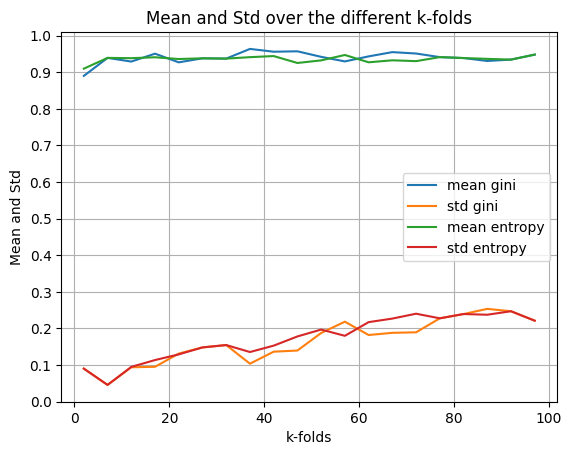

In [7]:

import matplotlib.pyplot as plt


print(f'First mean gini: {mean_scores_gini[0]} and std gini: {std_scores_gini[0]}')
print(f'Last mean gini: {mean_scores_gini[-1]} and std gini: {std_scores_gini[-1]}')
print(len(mean_scores_gini))
print(len(std_scores_gini))
print(len(kfolds))
# plot per model their mean and std over the different k-folds
plt.plot(kfolds, mean_scores_gini, label='mean gini')
plt.plot(kfolds, std_scores_gini, label='std gini')
plt.plot(kfolds, mean_scores_entropy, label='mean entropy')
plt.plot(kfolds, std_scores_entropy, label='std entropy')

plt.legend()
# title and labels
plt.title('Mean and Std over the different k-folds')
plt.xlabel('k-folds')
plt.ylabel('Mean and Std')
# on y as tick per .1
plt.yticks(np.arange(0, 1.1, 0.1))
# plot dotted line from first to last point
plt.grid(True)
# show plot
plt.show()

# print the first mean and std and the last mean and std



    

[[ 4 13  8  4]
 [10  5  5  8]
 [ 4  6  5  4]
 [ 9  5  6  4]]


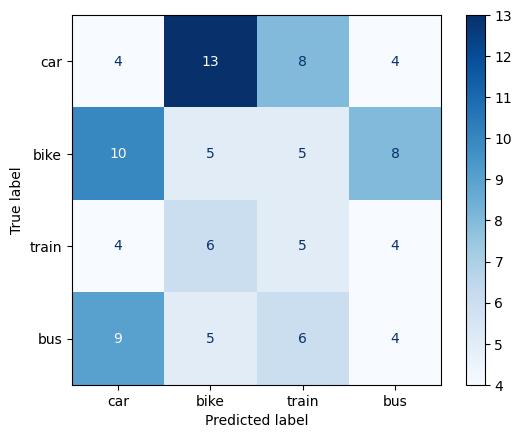

In [9]:

random = Random(x=42)
labels = ["car", "bike", "train", "bus"]	
y_pred = [labels[random.randint(0, len(labels) -1)] for i in range(0, 100)]
y_true = [labels[random.randint(0, len(labels) -1)] for i in range(0, 100)]

# for pred,true in zip(y_pred, y_true):
#     print(pred,true)

# plot confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_true, y_pred, labels=labels)
df_cm = pd.DataFrame(cm, index=labels, columns=labels)
print(cm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=labels)
disp.plot(cmap=plt.cm.Blues)
plt.show()




In [ ]:
df_cm

,car,bike,bus,train
car,5,4,9,7
bike,4,6,5,13
bus,7,8,8,5
train,5,3,8,3
